In [3]:
import pandas as pd
df = pd.read_csv('Datasets/Superstore.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
## Find the best selling Category by Sales Value
def max_sales_cat(df):
    s = df.groupby(['Category'])['Sales'].sum().to_frame().rename(columns={"Category": "sales"}).reset_index()
    return [s.loc[s['Sales'] >= s['Sales'].max(), 'Category']]
max_sales_cat(df)

[2    Technology
 Name: Category, dtype: object]

In [4]:
## Find the best selling Category by Sales Quantity

def max_sales_cat_quant(df):
    s = df.groupby(['Category'])['Quantity'].sum().to_frame().rename(columns={"Category": "Quantity"}).reset_index()
    return [s.loc[s['Quantity'] >= s['Quantity'].max(), 'Category']]
max_sales_cat_quant(df)

[1    Office Supplies
 Name: Category, dtype: object]

In [5]:
## Find Most profitable Category
def max_profit_cat(df):
    s = df.groupby(['Category'])['Profit'].sum().to_frame().rename(columns={"Category": "Profit"}).reset_index()
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Category']]
max_profit_cat(df)

[2    Technology
 Name: Category, dtype: object]

In [6]:
##Find top Selling Sub-Categorys
df.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False).reset_index().head(3)

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Phones,4395985,47897175,330007.054,3289,137.4,44515.7306
1,Chairs,3121503,34936229,328449.103,2356,105.0,26590.1663
2,Storage,4126649,46248720,223843.608,3158,63.2,21278.8264


In [7]:
## Find Most Profitable Sub-Categorys
df.groupby(["Sub-Category"]).sum().sort_values("Profit", ascending=False).reset_index().head(3)

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Copiers,355661,3873477,149528.030,234,11.0,55617.8249
1,Phones,4395985,47897175,330007.054,3289,137.4,44515.7306
2,Accessories,3928080,44468434,167380.318,2976,60.8,41936.6357


In [8]:
## Which is the Top Selling Sub-Category?
def max_sales_sub_cat(df):
    s = df.groupby(['Sub-Category'])['Sales'].sum().to_frame().rename(columns={"Sub-Category": "sales"}).reset_index()
    return [s.loc[s['Sales'] >= s['Sales'].max(), 'Sub-Category']]
max_sales_sub_cat(df)

[13    Phones
 Name: Sub-Category, dtype: object]

In [9]:
## Which is the Preferred Ship Mode?
def pref_ship_mode(df):
    s = df.groupby(['Ship Mode']).size().reset_index(name='counts')
    return [s.loc[s['counts'] >= s['counts'].max(), 'Ship Mode']]
pref_ship_mode(df)

[3    Standard Class
 Name: Ship Mode, dtype: object]

In [10]:
## Which Region is the Most Profitable?
def prof_region(df):
    s = df.groupby(['Region']).size().reset_index(name='Profit')
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Region']]
prof_region(df)

[3    West
 Name: Region, dtype: object]

In [11]:
## Which City has the Highest Number of Sales?
def city_sales_cnt(df):
    s = df.groupby(['City']).size().reset_index(name='counts')
    return [s.loc[s['counts'] >= s['counts'].max(), 'City']]

city_sales_cnt(df)

[329    New York City
 Name: City, dtype: object]

In [13]:
df['Sales'].mean(axis = 0)

229.8580008304938

In [15]:
df['Quantity'].median(axis = 0)

3.0

In [17]:
df['Category'].mode()

0    Office Supplies
dtype: object

In [21]:
df['Quantity'].mad()

1.7427388592451132

In [22]:
df['Sales'].var()

388434.45530807687

In [23]:
df['Sales'].std()

623.2451005086818

In [24]:
df['Sales'].skew(axis = 0)

12.97275234181623

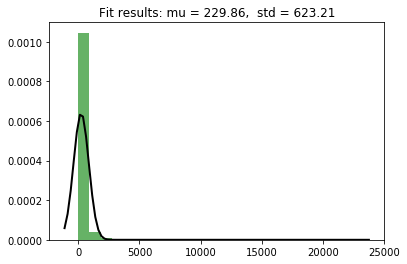

In [67]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(df['Sales'])

# Plot the histogram.
plt.hist(df['Sales'], bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

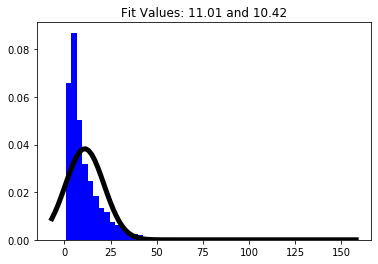

In [69]:
df['sqt_tr_sales'] = np.sqrt(df['Sales'])

# Fit a normal distribution to the data:
mu, std = norm.fit(df['sqt_tr_sales'])

plt.hist(df['sqt_tr_sales'], bins=50, density=True, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=5)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
    
plt.show()

In [129]:
np.log(df['Sales'])

0       5.568192
1       6.595699
2       2.682390
3       6.864407
4       3.107631
          ...   
9989    3.228747
9990    4.521354
9991    5.555190
9992    3.387774
9993    5.493720
Name: Sales, Length: 9994, dtype: float64

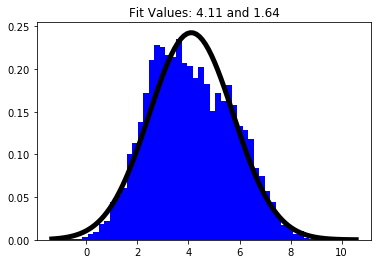

In [68]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df['lg_tr_sales'])

plt.hist(df['lg_tr_sales'], bins=50, density=True, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=5)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
    
plt.show()

In [130]:
df["Sales"].skew(axis = 0)

12.97275234181623

In [74]:
df['lg_tr_sales'].skew(axis = 0)

0.18864805793321923

In [70]:
df['Sales'].kurtosis(axis = 0)

305.311753246823

In [75]:
from scipy.stats import kstest,norm

ks_statistic, p_value = kstest(df['Sales'], 'norm')
print(ks_statistic, p_value)

0.9820648440401365 0.0


If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution 
If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [82]:
import scipy
shapiro_wilk_test = stats.shapiro(df['Sales'])
shapiro_wilk_test

(0.32332730293273926, 0.0)

In [85]:
stats.shapiro(df['lg_tr_sales'])

(0.9910891056060791, 1.6356040849321627e-24)

In [98]:
## One Sample t test
# H0:- Sample mean = Population mean
# H1:- Sample mean != Population mean

d = pd.read_csv('area.csv')
t_statistic, p_value = stats.ttest_1samp(a=d, popmean=1200)
print(t_statistic , p_value)

[2.79941685] [0.02073238]


In [103]:
## A car Manafacturer claims that the average fuel efficiency of the car is 20 KMPL. 
# they tested 12 cars and the respective milage is recorded. 
# Find out if the companies claim is true
x = [21.5, 24.5, 18.5, 17.2, 19.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]

from scipy import stats
t_statistic, p_value = stats.ttest_1samp(a=x, popmean=20)
print(t_statistic , p_value)

0.8331582672705654 0.4224773083269333


In [89]:
# Independent sample t test
data = pd.read_csv('iris.csv')
data.groupby("species")['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [95]:
setosa = data[(data['species'] == 'setosa')]
versicolor = data[(data['species'] == 'versicolor')]

# H0:- Mean(setosa['sepal_width']) == Mean(versicolor['sepal_width'])
# H1:- Mean(setosa['sepal_width']) != Mean(versicolor['sepal_width'])
alpha = 0.05
from scipy import stats


stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

In [131]:
stats.levene(pre, post)

LeveneResult(statistic=0.9731931668856769, pvalue=0.33233363915453784)

In [104]:
## Paired sample t test
# H0:- Mean(before training) == Mean(after training)
# H1:- Mean(before training) != Mean(after training)

pre = [88, 82, 84, 93, 75, 78, 84, 87,95, 91, 83, 89, 77, 68, 91]
post = [91, 84, 88, 90, 79, 80, 88, 90,90, 96, 88, 89, 81, 74, 92]
stats.ttest_rel(pre, post)

Ttest_relResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272)

In [110]:
## One Way ANOVA
# 4 test results 

t = pd.read_csv('test.csv')

fvalue, pvalue = stats.f_oneway(t['A'], t['B'], t['C'], t['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [120]:
## Two way ANOVA


# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
dataframe = pd.DataFrame({'Watering': np.repeat(['daily', 'weekly'], 15),
                          'Fertilizer': np.repeat(['daily', 'weekly'], 15),
                          'height': [14, 15, 16, 16, 17, 18, 14, 13, 14, 
                                     15, 16, 16, 17, 18, 14, 13, 14, 14, 
                                     18, 17, 16, 16, 17, 18, 14, 19, 14, 
                                     18, 19, 15]})
# Performing two-way ANOVA
model = ols('height ~ C(Fertilizer) + C(Watering) +\
C(Fertilizer):C(Watering)',data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   2.700000  2.700000  0.826531  0.371037
C(Watering)                 1.0   0.897593  0.897593  0.274773  0.604273
C(Fertilizer):C(Watering)   1.0   1.094373  1.094373  0.335012  0.567350
Residual                   28.0  91.466667  3.266667       NaN       NaN


In [132]:
dataframe

,Watering,Fertilizer,height
0,daily,daily,14
1,daily,daily,15
2,daily,daily,16
3,daily,daily,16
4,daily,daily,17
5,daily,daily,18
6,daily,daily,14
7,daily,daily,13
8,daily,daily,14
9,daily,daily,15


In [122]:
## Chi Square 
# we will test if there is an association between willingness to discuss a mental health issues 
# with a direct supervisor and currently having a mental health disorder.

dta = pd.read_csv('mental-heath-in-tech.csv')


In [123]:
dta['Do you currently have a mental health disorder?'].value_counts()

Yes      575
No       531
Maybe    327
Name: Do you currently have a mental health disorder?, dtype: int64

In [124]:
dta['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'].value_counts()

Some of my previous employers           654
No, at none of my previous employers    416
I don't know                            101
Yes, at all of my previous employers     93
Name: Would you have been willing to discuss a mental health issue with your direct supervisor(s)?, dtype: int64

In [125]:
def drop_maybe(series):
    if series.lower() == 'yes' or series.lower() == 'no':
        return series
    else:
        return
dta['current_mental_disorder'] = dta['Do you currently have a mental health disorder?'].apply(drop_maybe)
dta['current_mental_disorder'].value_counts()

Yes    575
No     531
Name: current_mental_disorder, dtype: int64

In [126]:
dta['willing_discuss_mh_supervisor'] = dta['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?']
dta['willing_discuss_mh_supervisor'].value_counts()

Some of my previous employers           654
No, at none of my previous employers    416
I don't know                            101
Yes, at all of my previous employers     93
Name: willing_discuss_mh_supervisor, dtype: int64

In [128]:
crosstab = pd.crosstab(dta['willing_discuss_mh_supervisor'], dta['current_mental_disorder'])
stats.chi2_contingency(crosstab)

(32.408194625396376,
 4.292859793048239e-07,
 3,
 array([[ 37.69547325,  42.30452675],
        [147.48353909, 165.51646091],
        [237.48148148, 266.51851852],
        [ 35.33950617,  39.66049383]]))

We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a 
relationship between willingness to discuss a mental health issues with a direct supervisor and currently having a 
mental health disorder within the tech/IT workplace.

In [2]:
dfb = pd.read_csv('blank_val.csv')


NameError: name 'pd' is not defined

In [13]:

import pandas as pd
import numpy as np
data = pd.read_csv('ML2_Regression.csv')
data.head()

,sales,youtube,facebook,newspaper
0,26.52,276.12,45.36,83.04
1,12.48,53.40,47.16,54.12
2,11.16,20.64,55.08,83.16
3,22.20,181.80,49.56,70.20
4,15.48,216.96,12.96,70.08


In [14]:
!pip install statsmodels

In [16]:
import statsmodels.api as sm

X=data[['newspaper']]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 11 Jun 2022   Prob (F-statistic):            0.00115
Time:                        11:58:02   Log-Likelihood:                -644.80
No. Observations:                 200   AIC:                             1294.
Df Residuals:                     198   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8217      0.746     19.876      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
import statsmodels.api as sm

X=data[['facebook']]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           4.35e-19
Time:                        11:58:10   Log-Likelihood:                -609.80
No. Observations:                 200   AIC:                             1224.
Df Residuals:                     198   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1740      0.675     16.542      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
import statsmodels.api as sm

X=data[['youtube']]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        11:58:42   Log-Likelihood:                -555.51
No. Observations:                 200   AIC:                             1115.
Df Residuals:                     198   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4391      0.549     15.360      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
import statsmodels.api as sm

X=data[['newspaper',"facebook","youtube"]]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        12:42:43   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
import statsmodels.api as sm

X=data[['newspaper',"facebook"]]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           4.96e-18
Time:                        12:42:50   Log-Likelihood:                -609.70
No. Observations:                 200   AIC:                             1225.
Df Residuals:                     197   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0267      0.753     14.640      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
import statsmodels.api as sm

X=data[["facebook","youtube"]]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           4.83e-98
Time:                        12:42:58   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5053      0.353      9.919      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
import statsmodels.api as sm

X=data[['newspaper',"facebook","youtube"]]
Y=data["sales"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        13:04:47   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
data2 = pd.read_csv('insurance - Copy.csv')
data2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,NaN,3866.85520


In [32]:
import statsmodels.api as sm

X=data2[['age',"bmi","children"]]
Y=data2["charges"]
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

MissingDataError: exog contains inf or nans

In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1313 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
data2.isnull().sum()

age          0
gender       0
bmi         25
children     0
smoker       0
region       7
charges      0
dtype: int64